In this project, we want to study the bike share system in Jersey City using the data provided by Citi Bike company. Questions such as "Where do Citi Bikers ride?" "When do they ride?" "How far do they go?" "Which stations are most popular?" "What days of the week are most rides taken on?" will be answered in this project using this rich data source.

The Citi Bike System Data page gives the description of the information as follows:  

    
    Trip Duration (seconds)
    Start Time and Date
    Stop Time and Date
    Start Station Name
    End Station Name
    Station ID
    Station Lat/Long
    Bike ID
    User Type (Customer = 24-hour pass or single ride user; Subscriber = Annual Member)
    Gender (Zero=unknown; 1=male; 2=female)
    Year of Birth

In [232]:
### Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

For this project, we will use the 2016 bike share data for Jersey City which comprises of 12 months data. The files are uploaded in the next cell

In [233]:
####################  Merged dataset for the year 2016 ##########
list_of_names=["JC-20161-citibike-tripdata.csv","JC-20162-citibike-tripdata.csv","JC-20163-citibike-tripdata.csv","JC-201604-citibike-tripdata.csv","JC-201605-citibike-tripdata.csv","JC-201606-citibike-tripdata.csv","JC-201607-citibike-tripdata.csv","JC-201608-citibike-tripdata.csv","JC-201609-citibike-tripdata.csv","JC-201610-citibike-tripdata.csv","JC-201611-citibike-tripdata.csv","JC-201612-citibike-tripdata.csv"]

# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv("C:/Users/USER/Desktop/AIMS RW/BikeShare/"+list_of_names[i])
    dataframes_list.append(temp_df)

We merge the data to form a single data frame for the whole year.

In [234]:
df=pd.concat(dataframes_list)

We want to get the glimpse of the data in the next cells

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247584 entries, 0 to 15113
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Trip Duration            247584 non-null  int64  
 1   Start Time               247584 non-null  object 
 2   Stop Time                247584 non-null  object 
 3   Start Station ID         247584 non-null  int64  
 4   Start Station Name       247584 non-null  object 
 5   Start Station Latitude   247584 non-null  float64
 6   Start Station Longitude  247584 non-null  float64
 7   End Station ID           247584 non-null  int64  
 8   End Station Name         247584 non-null  object 
 9   End Station Latitude     247584 non-null  float64
 10  End Station Longitude    247584 non-null  float64
 11  Bike ID                  247584 non-null  int64  
 12  User Type                247204 non-null  object 
 13  Birth Year               228585 non-null  float64
 14  Gende

It can be seen that the data has a total of 247584 with 15 columns and their corresponding data types.

The types int64 and float64 indicate 64-bit integer and floating type values, object indicates strings.

However, looking at the "Non-Null Count" columns indicate that some columns have fewer entries than others.

We check for null values across the dataframe

In [236]:
df.isnull().sum()

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                    380
Birth Year                 18999
Gender                         0
dtype: int64

We found 380 null values in the "User Type" column and another 18999 in the "Birth Year" column. We can simply drop the null values to have a clean data.

In [237]:
df = df.dropna(how='any',axis=0)

print("Null values removed successfully.")

df.isnull().sum()

Null values removed successfully.


Trip Duration              0
Start Time                 0
Stop Time                  0
Start Station ID           0
Start Station Name         0
Start Station Latitude     0
Start Station Longitude    0
End Station ID             0
End Station Name           0
End Station Latitude       0
End Station Longitude      0
Bike ID                    0
User Type                  0
Birth Year                 0
Gender                     0
dtype: int64

Further information especially on the numeric columns could be obtained as follows

In [238]:
df.describe().round(2)

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender
count,228205.00,228205.0,228205.00,228205.00,228205.0,228205.00,228205.00,228205.00,228205.00,228205.00
mean,742.37,3207.2,40.72,-74.05,3203.9,40.72,-74.05,24938.68,1979.33,1.22
std,36999.06,27.0,0.01,0.01,55.4,0.01,0.01,749.94,9.60,0.42
min,61.00,3183.0,40.69,-74.10,173.0,40.69,-74.10,14552.00,1900.00,0.00
25%,242.00,3186.0,40.72,-74.05,3186.0,40.72,-74.05,24491.00,1974.00,1.00
50%,370.00,3202.0,40.72,-74.04,3198.0,40.72,-74.04,24612.00,1981.00,1.00
75%,611.00,3211.0,40.73,-74.04,3211.0,40.73,-74.04,24719.00,1986.00,1.00
max,16329808.00,3426.0,40.75,-74.03,3426.0,40.80,-73.96,27274.00,2000.00,2.00


We can grasp many information just from the above summaries:
    
    
Trip Duration has a minimum of 61 (seconds) as City Bike ignores any trip less than a minute. However, the maximum duration is 16329808.00 is very higher than the minimum, such kind of the extremes will affect the average value and the whole computation, so, we need to convert it into another unit for example in minutes for better analysis.
    
The columns of Start/Stop time were missing here as we saw earlier they are object type, thus they need to be converted to timestamp for us to handle them appropriateley.

The minimum Birth Year shows 1900, so, by 2016 the person is 116 year old, that is an outlier which needs to be dropped.

#### Data Analysis

As we saw ealier, we can get additional information about the data in the data frame about each column showing its name, number of unique values, its data type and the amount of memory that column consumes.

In [239]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,Trip Duration,4341,int64,3651280
1,Start Time,225494,object,19169220
2,Stop Time,225396,object,19169220
3,Start Station ID,51,int64,3651280
4,Start Station Name,51,object,17707563
5,Start Station Latitude,51,float64,3651280
6,Start Station Longitude,51,float64,3651280
7,End Station ID,90,int64,3651280
8,End Station Name,90,object,17712343
9,End Station Latitude,90,float64,3651280




Here it can be seen that the columns with a data type of object take up larger memory space than the integer or float data types. We can adress this problem in order to free up the memory for faster computatios.

One way is to convert those columns into categorical variables.

In [240]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Stop Time'] = pd.to_datetime(df['Stop Time'])

In [241]:
cols = ['Start Station Name', 'End Station Name', 'User Type']
for col in cols:
    df[col] = df[col].astype('category')

In [242]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,Trip Duration,4341,int64,3651280
1,Start Time,225494,datetime64[ns],3651280
2,Stop Time,225396,datetime64[ns],3651280
3,Start Station ID,51,int64,3651280
4,Start Station Name,51,category,2059534
5,Start Station Latitude,51,float64,3651280
6,Start Station Longitude,51,float64,3651280
7,End Station ID,90,int64,3651280
8,End Station Name,90,category,2062557
9,End Station Latitude,90,float64,3651280


The new result shows that the converted columns use smaller portion of the memory space as we desired.

#### Analysing By User Type


In [243]:
df['User Type'].value_counts()

Subscriber    228154
Customer          51
Name: User Type, dtype: int64

It is obvious that majority of the riders are subscribers with very small fraction as customers. So, we'd not focus much on the difference in the activities of the two groups

#### Analysing Trip Duration

We want to know what the most common trip duration times are. The Trip Duration column is stored in seconds which is going to be converted to minues as a new column with a nane Trip minutes.

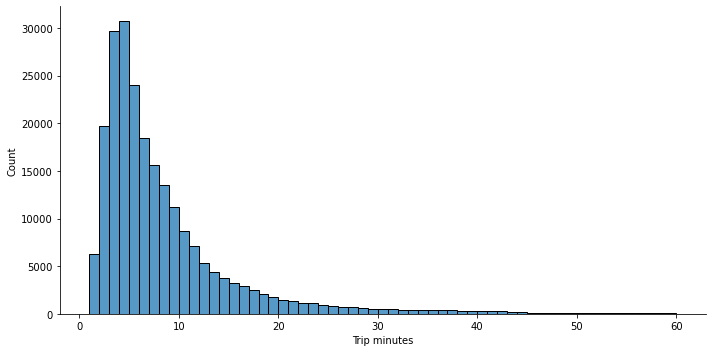

In [244]:
df['Trip minutes'] = df['Trip Duration'] // 60
sns.displot(data=df,x="Trip minutes", bins=range(1,61), aspect=10/5)

This chart shows that the most common trip is five minutes long (the tallest bar) followed by four and six minutes (the bars before and after that one). After that the chart shows a classic “long tail” of fewer trips for longer rides.

##### By Hour, Day and Month

Now we'd like to know the pattern of the trips across the daily hours, days of the month and the 12 months of the year.

In [245]:
df['start hour']=df['Start Time'].dt.hour.astype('category')
df['start day']=df['Start Time'].dt.day.astype('category') 
df['weekday']=df['Start Time'].dt.weekday.astype('category')
df['month_num']=df['Start Time'].dt.month.astype('category')

In [246]:
month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
df["start_month_name"]= df["month_num"].apply(lambda y:month_dict[y])
df["start_month_name"].unique()

['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December']

[4, 5, 6, 0, 1, 2, 3]
Categories (7, int64): [4, 5, 6, 0, 1, 2, 3]

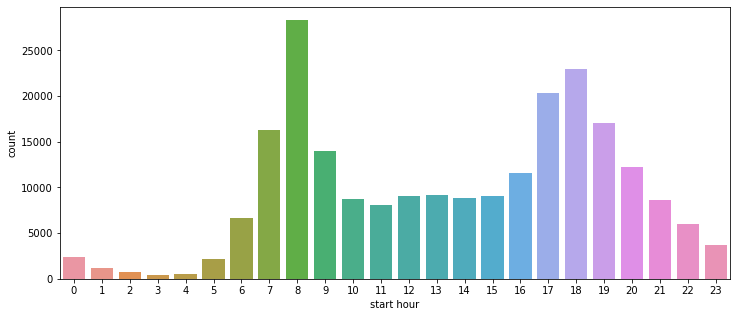

In [247]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="start hour")
df.weekday.unique()

As expected, we can see the peak of rides at the morning and evening rush hours.

In [248]:
import datetime as dt

df["start_day_name"]= df[["Start Time"]].apply(lambda x: dt.datetime.strftime(x['Start Time'], "%A"), axis=1)
df.start_day_name.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

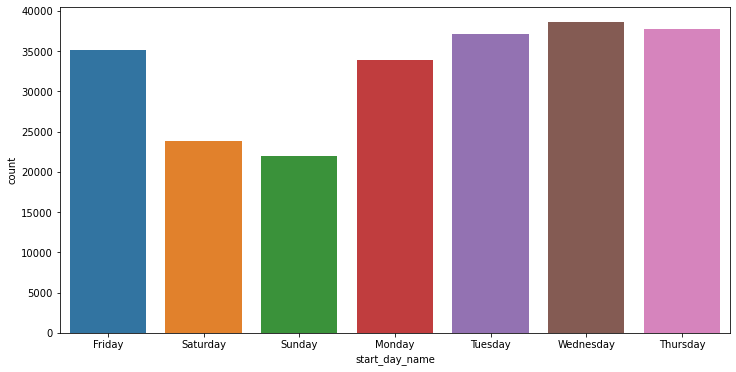

In [249]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="start_day_name")
df.start_day_name.unique()

The above chart shows that the riders mostly use the bikes during the workdays especially on Wednesday, followed by Tuesday and Thursday. On the other hand, there were few rides on the weekend.

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

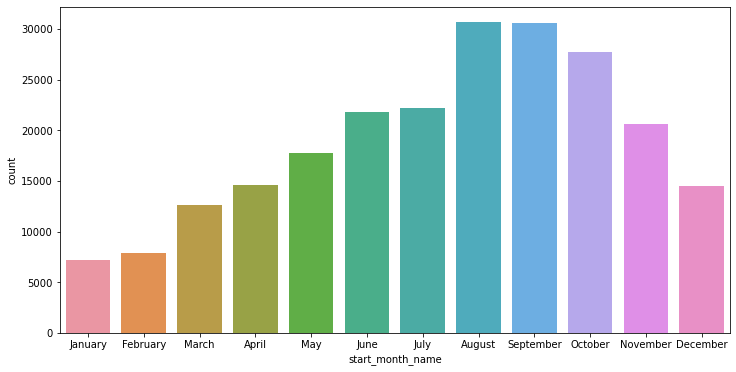

In [250]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="start_month_name")
df.start_day_name.unique()

The pattern exhibits by the riders across the indicates that the months have a huge variation in terms of riding activities.
The riding has its peak in August and September, which then falls from October until January, the activities dramatically rises from March through September. This is in concord with Mark Martinez's result, that weather has impact on bikesharing activities. He conducted his researc on the same bikesharing operator we are considering, Citi Bike, on its New York City and Jersey City data from 2013 to 2015. His research found that weather variables such as temperature, precipitation, snowfall and wind speed have impact on bikesharing. He further explained that riders are detered from using bikes when there is high precipitation, extra snowfall and high wind speed.


#### References

"The Impact Weather Has on NYC Citi Bike Share Company Activity,"
Journal of
Environmental and Resource Economics at Colby: Vol. 4 : Iss. 1 , Article 12.
Available at: https://digitalcommons.colby.edu/jerec/vol4/iss1/12

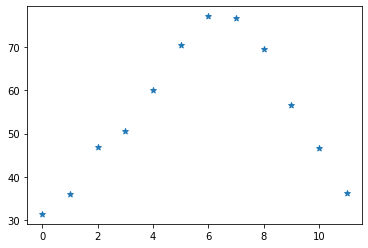

In [251]:
##### Average Monthly temperature for the year 2016 for New Jersey state, obtained from NJ State Climatologist bwebsite : climate.rutgers.edu


JC_2016_monthly_avg_temp=[31.4, 36,47,50.7,60.2,70.6,77.2,76.9,69.7,56.7,46.7,36.3]
x = JC_2016_monthly_avg_temp
y=np.arange(0, 12,1)
plt.scatter(y,x, marker="*")


The pattern resembles the pattern exhibit by the riders in Jersey City, which further confirms that the weather has impact on the bike share activities.

#### Trip across stations

We'd like to know which of the stations is freweuntly used


<AxesSubplot:>

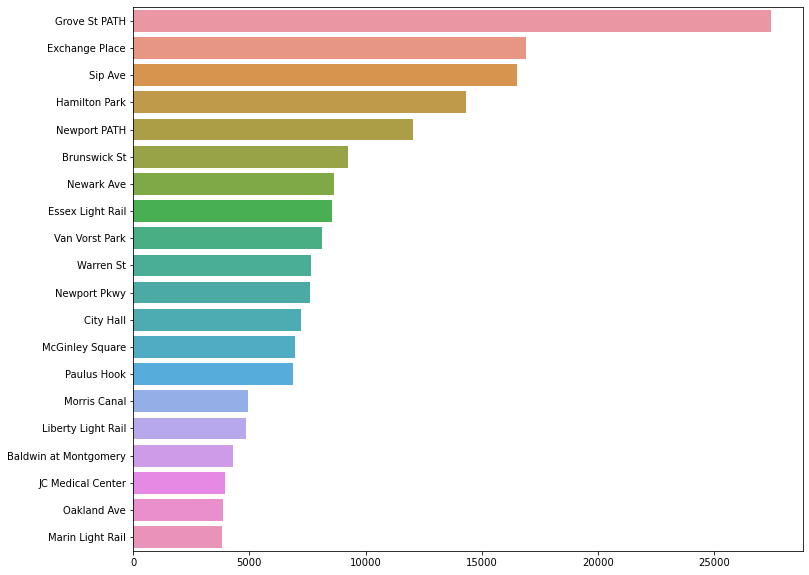

In [224]:
startstation = df['Start Station Name'].value_counts()[:20]
plt.figure(figsize=(12,10))


sns.barplot(x=startstation.values , y=list(startstation.index), 
 orient="h")

The chart shows that "Grove St PATH" emergs the most frequent station used by riders which comes with no surprise since it is situated along the Grove Street Rail Station in the Downtown neighborhood of Jersey City.

#### Birth Year Analysis


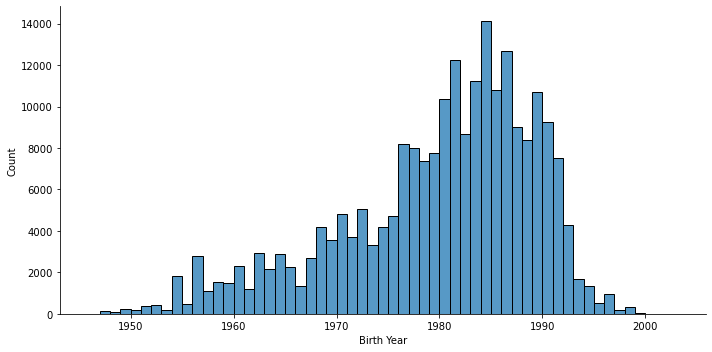

In [225]:
sns.displot(data=df, x="Birth Year" , bins=range(1946,2004),  aspect=10/5)

The distribution above shows that the birth year of the riders is skewed. Indicating that the younger riders tend to use bikes more than the older ones.

#### Trip Distances

To find the distances covered by each rider, we'll use the Haversine Formula which calculates the “great circle” distance between any two points on earth.

In [226]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    
    lon1, lat1, lon2, lat2 = \
    map(np.radians ,[lon1, lat1, lon2, lat2])
    h = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2    
    miles = 3959 * (2 * np.arcsin(np.sqrt(h)))
    
    return miles

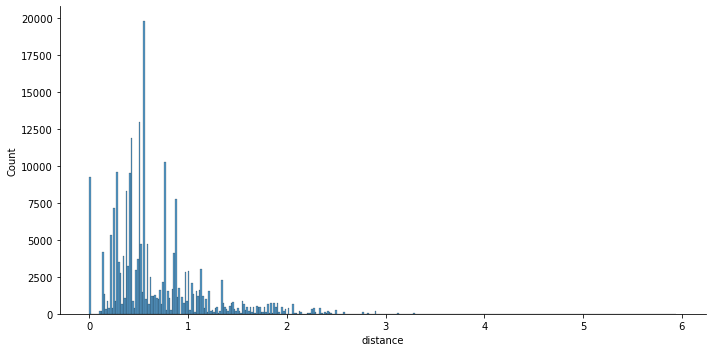

In [227]:
distance = haversine(df['Start Station Latitude'],df['Start Station Longitude'],df['End Station Latitude'],df['End Station Longitude'])
df['distance'] = distance
sns.displot(data=df, x="distance",  aspect=10/5)


The chart shows that most of the riders drive less than 1 miles, approximately half mile. This shows that riders take ride for short journeys.

#### Speed analysis
Further analysis using the speed of the riders will help us get more insights about the trip activities

In [228]:
df['Speed']=np.round((df['distance']/df['Trip Duration'])*5793.64,6)

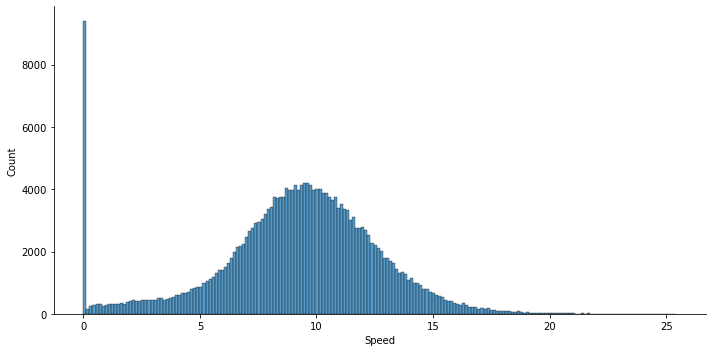

In [229]:
sns.displot(data=df, x="Speed",  aspect=10/5)


An interesting fact emerges from the distribution of the speeds of the riders in km/hr. We can see that many riders drive at almost 0 km/hr that makes sense especially for those who ride for leisure. We can chech further the kind of people in the group. 
Another thing we can see is that the speed is generally normally distributed among the riders. We can derive moe facts if we drop the zero speed riders

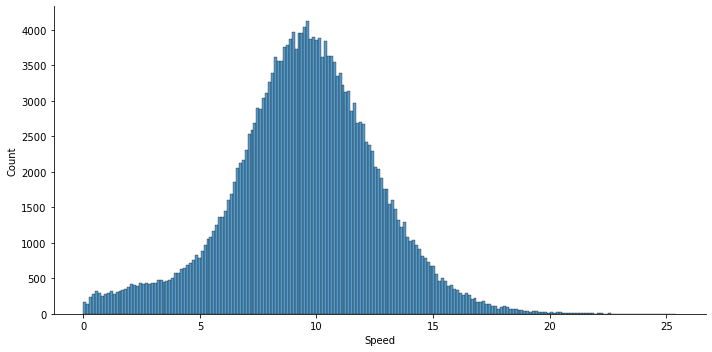

In [230]:
m=df[df['Speed']!=0]['Speed']
sns.displot(x=m,  aspect=10/5)


In [231]:
df['Speed'].describe()

count    228205.000000
mean          9.091892
std           3.596922
min           0.000000
25%           7.342635
50%           9.404101
75%          11.365206
max          25.417534
Name: Speed, dtype: float64

We can observe that the average speed is 9km/hr